First we will import some important libraries which we will use in the pre-processing and EDA



# Import Libraries

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
import warnings 
import plotly.express as px
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)

# Import the Data

In [2]:
df=pd.read_csv('zomato.csv',encoding='ISO-8859-1')
dfcountry = pd.read_excel('Country-Code.xlsx')
df = pd.merge(df, dfcountry, on='Country Code')

In [3]:
df.describe()

Restaurant ID  Country Code    Longitude     Latitude  \
count   9.551000e+03   9551.000000  9551.000000  9551.000000   
mean    9.051128e+06     18.365616    64.126574    25.854381   
std     8.791521e+06     56.750546    41.467058    11.007935   
min     5.300000e+01      1.000000  -157.948486   -41.330428   
25%     3.019625e+05      1.000000    77.081343    28.478713   
50%     6.004089e+06      1.000000    77.191964    28.570469   
75%     1.835229e+07      1.000000    77.282006    28.642758   
max     1.850065e+07    216.000000   174.832089    55.976980   

       Average Cost for two  Price range  Aggregate rating         Votes  
count           9551.000000  9551.000000       9551.000000   9551.000000  
mean            1199.210763     1.804837          2.666370    156.909748  
std            16121.183073     0.905609          1.516378    430.169145  
min                0.000000     1.000000          0.000000      0.000000  
25%              250.000000     1.000000          2.500000      5.000000  
50%              400.000000     2.000000          3.200000     31.000000  
75%              700.000000     2.000000          3.700000    131.000000  
max           800000.000000     4.000000          4.900000  10934.000000

In [4]:
df

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
9546        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
9547        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
9548        5915807                     Huqqa           208         ÛÁstanbul   
9549        5916112              Aôôk Kahve           208         ÛÁstanbul   
9550        5927402  Walter's Coffee Roastery           208         ÛÁstanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
9546  Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...   
9547  Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...   
9548  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9549  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
9550  CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
9546                                    Karakí_y   
9547                                   Koôuyolu   
9548                                 Kuruí_eôme   
9549                                 Kuruí_eôme   
9550                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
9546                                Karakí_y, ÛÁstanbul   28.977392   
9547                               Koôuyolu, ÛÁstanbul   29.041297   
9548                             Kuruí_eôme, ÛÁstanbul   29.034640   
9549                             Kuruí_eôme, ÛÁstanbul   29.036019   
9550                                    Moda, ÛÁstanbul   29.026016   

       Latitude                          Cuisines  Average Cost for two  \
0     14.565443        French, Japanese, Desserts                  1100   
1     14.553708                          Japanese                  1200   
2     14.581404  Seafood, Asian, Filipino, Indian                  4000   
3     14.585318                   Japanese, Sushi                  1500   
4     14.584450                  Japanese, Korean                  1500   
...         ...                               ...                   ...   
9546  41.022793                           Turkish                    80   
9547  41.009847   World Cuisine, Patisserie, Cafe                   105   
9548  41.055817            Italian, World Cuisine                   170   
9549  41.057979                   Restaurant Cafe                   120   
9550  40.984776      

# Check if there's any Nan value

In [5]:
df.isna().sum()

Restaurant ID           0
Restaurant Name         0
Country Code            0
City                    0
Address                 0
Locality                0
Locality Verbose        0
Longitude               0
Latitude                0
Cuisines                9
Average Cost for two    0
Currency                0
Has Table booking       0
Has Online delivery     0
Is delivering now       0
Switch to order menu    0
Price range             0
Aggregate rating        0
Rating color            0
Rating text             0
Votes                   0
Country                 0
dtype: int64

#### Replace 0 values to NaN

In [6]:
df.replace(to_replace=0,value=np.nan,inplace=True)

In [7]:
df.isna().sum()

Restaurant ID              0
Restaurant Name            0
Country Code               0
City                       0
Address                    0
Locality                   0
Locality Verbose           0
Longitude                498
Latitude                 498
Cuisines                   9
Average Cost for two      18
Currency                   0
Has Table booking          0
Has Online delivery        0
Is delivering now          0
Switch to order menu       0
Price range                0
Aggregate rating        2148
Rating color               0
Rating text                0
Votes                   1094
Country                    0
dtype: int64

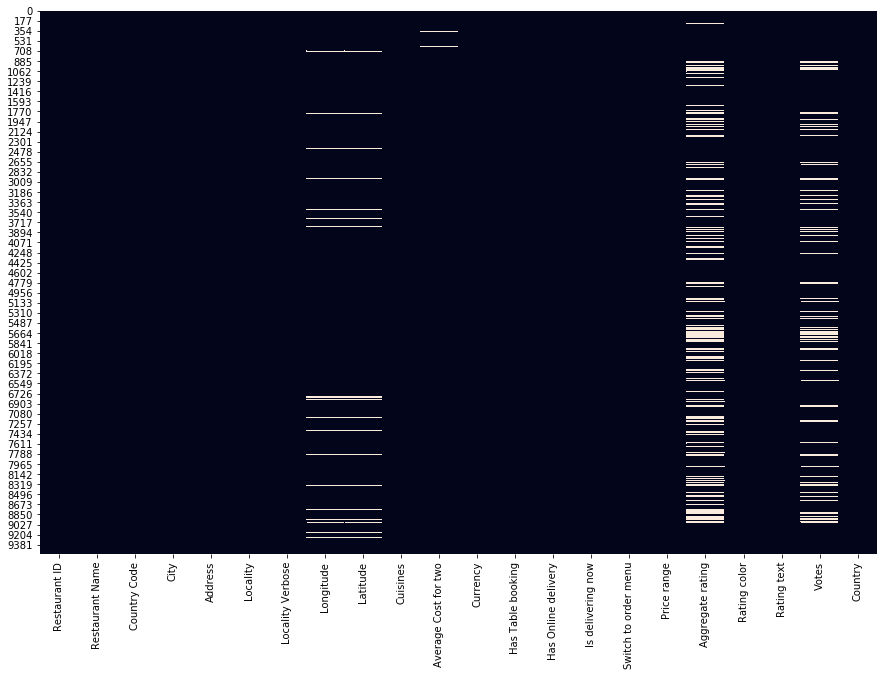

In [8]:
#Check Nan by Heatmap visualization
plt.figure(figsize=(15,10))
sns.heatmap(df.isnull(), cbar=False)
plt.show()

In [9]:
df.loc[9312]

Restaurant ID                                      18450836
Restaurant Name                              Winona Forever
Country Code                                            148
City                                               Auckland
Address                 100 Parnell Road, Parnell, Auckland
Locality                                            Parnell
Locality Verbose                          Parnell, Auckland
Longitude                                           174.779
Latitude                                                NaN
Cuisines                                               Cafe
Average Cost for two                                     50
Currency                                      NewZealand($)
Has Table booking                                        No
Has Online delivery                                      No
Is delivering now                                        No
Switch to order menu                                     No
Price range                             

In [10]:
def fillLong(x):
    # check if the value is nan
    if pd.isnull(x['Longitude']):
        # take unique item from city
        city=df[df['Longitude'].isna()]
        for item in city['City'].unique():
            # comparing city of nan values 
            if x['City'] == item:
                # return values for fill nan values
                return df[df['City']==item]['Longitude'].mean()
    else:
        #return if the values is not nan
        return x['Longitude']
def fillLat(x):
    if pd.isnull(x['Latitude']):
        city=df[df['Latitude'].isna()]
        for item in city['City'].unique():
            if x['City'] == item:
                return df[df['City']==item]['Latitude'].mean()
    else:
        return x['Latitude']


In [11]:
df['Longitude']=df.apply(fillLong,axis=1)
df['Latitude']=df.apply(fillLat,axis=1)

# Fill Nan values with the most common cuisine based on the country

In [12]:
df[df['Country']=='United States']

Restaurant ID                             Restaurant Name  Country Code  \
82        17284404                 Austin's BBQ and Oyster Bar           216   
83        17284203                         BJ's Country Buffet           216   
84        17284105                               Cookie Shoppe           216   
85        17284302               El Vaquero Mexican Restaurant           216   
86        17284397              Elements Coffee Co - Northwest           216   
87        17284211              Pearly's Famous Country Cookng           216   
88        17284094                                 Chick-fil-A           216   
89        17284409               Guang Zhou Chinese Restaurant           216   
90        17284139                                Harvest Moon           216   
91        17284403                 Henry Campbell's Steakhouse           216   
92        17284145                              Hong Kong Cafe           216   
93        17284150                House of China Restaurant II           216   
94        17284158                           Jimmie's Hot Dogs           216   
95        17284175                           Locos Grill & Pub           216   
96        17284179                         Longhorn Steakhouse           216   
97        17284197                  Mikata Japanese Steakhouse           216   
98        17284241                 Shogun Japanese Steak House           216   
99        17284390         The Catch Seafood Room & Oyster Bar           216   
100       17284279                               Villa Gargano           216   
101       17284364                             3 Squares Diner           216   
102       17293281                           Last Resort Grill           216   
103       17293301                       Mama's Boy Restaurant           216   
104       17293409                                   Sr. Sol 1           216   
105       17293163                          Choo Choo Eastside           216   
106       17293228                                   The Grill           216   
107       17293880                         Big City Bread Cafe           216   
108       17293169                                     Clocked           216   
109       17293186           DePalma's Italian Cafe - Downtown           216   
110       17293180          DePalma's Italian Cafe - East Side           216   
111       17293205                                  Five & Ten           216   
112       17293229                                        Grit           216   
113       17293897                                  Ike & Jane           216   
114       17293273                    La Dolce Vita Ristorante           216   
115       17293870                                   Shokitini           216   
116       17293877                            Taqueria Del Sol           216   
117       17293890                                The National           216   
118       17293915                           The Royal Peasant           216   
119       17293422                           Transmetropolitan           216   
120       17293873                                Trappeze Pub           216   
121       17294014                     Viva! Argentine Cuisine           216   
122       17294556           Miyabi Kyoto Japanese Steak House           216   
123       17294607                          Rae's Coastal Cafe           216   
124       17294279                             The Bee's Knees           216   
125       17294300                            Boll Weevil Cafe           216   
126       17295215                             Farmhaus Burger           216   
127       17295028                         Manuel's Bread Cafe           216   
128       17294642                          Sconyers Bar B Que           216   
129       17295109                          Frog Hollow Tavern           216   
130       17294441     Giuseppe's Pizza & Italian Specialities           216   
131  

In [13]:
#unique values for country of nan values
CountryofNaN=df[df['Cuisines'].isna()]['Country'].unique()
for local in CountryofNaN:
    cuisine_check=df[df['Country']==local]
    cuisine_check['Cuisines']=cuisine_check.Cuisines.str.replace(' ','')
    cuisine_check.dropna(inplace=True)
    n=cuisine_check['Cuisines'].values # item cuisine based on Country
    #cleaning list from nan values
     
    #join cuisine list from cleaned list cuisine
    joincuisine=','.join(map(str,n))
    def removeDuplicate(text):
        textsplit=text.split(",")
        z=[]
        for i in textsplit:
            check=False
            for b in z:
                if b==i:
                    check = True
            if (check==False):
                z.append(i)
        return(z)
    listcuisine=removeDuplicate(joincuisine)
    jumlah=[]
    for item in listcuisine:
        jumlah.append(len(cuisine_check[cuisine_check.Cuisines.str.contains(item)]))
    print("List Cuisine in "+local+"\n" + str(list(zip(listcuisine, jumlah))))

List Cuisine in United States
[('BBQ', 29), ('Burger', 49), ('Seafood', 59), ('American', 121), ('CoffeeandTea', 7), ('Sandwich', 49), ('FastFood', 6), ('Asian', 23), ('Chinese', 22), ('Vegetarian', 22), ('Pizza', 46), ('BarFood', 24), ('Steak', 42), ('Tapas', 12), ('Japanese', 28), ('Sushi', 34), ('Italian', 37), ('Breakfast', 37), ('Diner', 6), ('Southern', 24), ('Southwestern', 7), ('Mexican', 32), ('Korean', 1), ('International', 12), ('Spanish', 6), ('Desserts', 19), ('LatinAmerican', 8), ('Argentine', 1), ('Caribbean', 7), ('French', 3), ('Indian', 7), ('German', 6), ('Vietnamese', 5), ('Thai', 19), ('European', 6), ('Teriyaki', 2), ('Brazilian', 2), ('Mediterranean', 10), ('Cajun', 9), ('Tex-Mex', 2), ('MiddleEastern', 3), ('Greek', 8), ('BubbleTea', 1), ('Cafe', 2), ('IceCream', 2), ('Cuban', 2), ('Hawaiian', 8), ('Salad', 1), ('Irish', 1), ('NewAmerican', 2), ('Tea', 9), ('SoulFood', 1), ('Turkish', 1), ('PubFood', 1), ('British', 1), ('Deli', 1), ('Beverages', 1)]


### After getting a list of cuisines in United States we take the most common cuisines in US

In [14]:
UScuisine=pd.DataFrame({'Cuisine':listcuisine,'Count':jumlah})
USmostserved=UScuisine.sort_values('Count',ascending=False)
USmostserved.reset_index(drop=True,inplace=True)
fillnan=USmostserved.head(1)['Cuisine'].values[0]
fillnan

'American'

### Because the common cuisine in US is American, we  fill the NaN Cuisine with 'American' 

In [15]:
df["Cuisines"].fillna(fillnan,inplace=True)

In [16]:
df[df['Longitude'].isna()]

Empty DataFrame
Columns: [Restaurant ID, Restaurant Name, Country Code, City, Address, Locality, Locality Verbose, Longitude, Latitude, Cuisines, Average Cost for two, Currency, Has Table booking, Has Online delivery, Is delivering now, Switch to order menu, Price range, Aggregate rating, Rating color, Rating text, Votes, Country]
Index: []

In [17]:
#re-check total NaN value 
df.isna().sum()

Restaurant ID              0
Restaurant Name            0
Country Code               0
City                       0
Address                    0
Locality                   0
Locality Verbose           0
Longitude                  0
Latitude                   0
Cuisines                   0
Average Cost for two      18
Currency                   0
Has Table booking          0
Has Online delivery        0
Is delivering now          0
Switch to order menu       0
Price range                0
Aggregate rating        2148
Rating color               0
Rating text                0
Votes                   1094
Country                    0
dtype: int64

# Exploratory Data Analysis (EDA)

## Cuisines

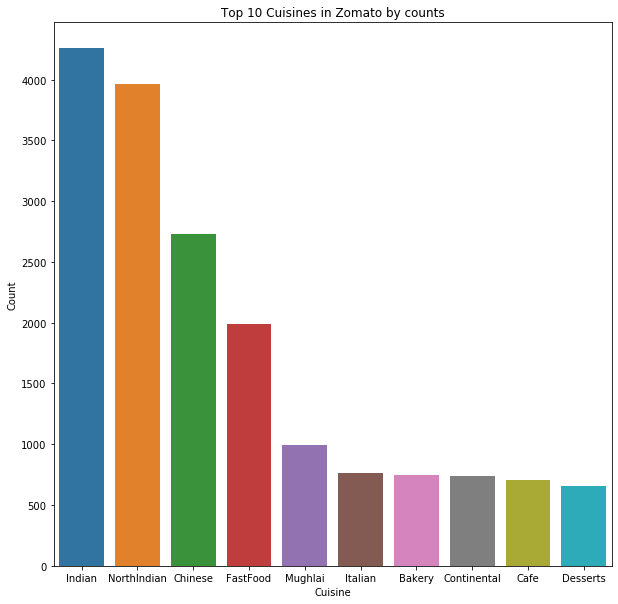

In [18]:
#Top 10 cuisine in Zomato by counts
#using same formula for fill nan values in cuisine
n=df.copy()
n['Cuisines']=n['Cuisines'].str.replace(' ','')
joincuisine=','.join(map(str,n['Cuisines'].values))
def removeDuplicate(text):
    textsplit=text.split(",")
    z=[]
    for i in textsplit:
        check=False
        for b in z:
            if b==i:
                check = True
        if (check==False):
            z.append(i)
    return(z)
listcuisine=removeDuplicate(joincuisine)
jumlah=[]
for item in listcuisine:
    jumlah.append(len(n[n['Cuisines'].str.contains(item)]))
#Create dataframe to count
worldcuisine=pd.DataFrame({'Cuisine':listcuisine,'Count':jumlah})
worldcuisine=worldcuisine.sort_values(by='Count',ascending=False)
worldcuisine.reset_index(drop=True,inplace=True)
#Take only top 10 data
w=worldcuisine.head(10)
plt.figure(figsize=(10,10))
ax=sns.barplot(x="Cuisine", y="Count", data=w)
ax.set_title('Top 10 Cuisines in Zomato by counts')
plt.show()

> From the graph above can be seen that the three top cuisines in Zomato are Asian cuisines and two of them are Indian dishes this is caused by the amount of restaurant data on Zomato the majority are in Asia, especially in the country of India

In [19]:
#WordCloud by Cuisine
from nltk.corpus import stopwords
import string
from sklearn.feature_extraction.text import CountVectorizer
def text_process(mess):
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]
bow_transformer = CountVectorizer(analyzer=text_process).fit(df['Cuisines'])
a=bow_transformer.vocabulary_
a

{'French': 56,
 'Japanese': 75,
 'Desserts': 43,
 'Seafood': 121,
 'Asian': 7,
 'Filipino': 52,
 'Indian': 68,
 'Sushi': 133,
 'Korean': 81,
 'Chinese': 33,
 'European': 50,
 'Mexican': 93,
 'American': 2,
 'Ice': 67,
 'Cream': 38,
 'Cafe': 26,
 'Italian': 73,
 'Pizza': 111,
 'Bakery': 12,
 'Mediterranean': 92,
 'Fast': 51,
 'Food': 55,
 'Brazilian': 19,
 'Arabian': 4,
 'Bar': 13,
 'Grill': 62,
 'International': 70,
 'Peruvian': 110,
 'Latin': 83,
 'Burger': 23,
 'Juices': 76,
 'Healthy': 65,
 'Beverages': 16,
 'Lebanese': 84,
 'Sandwich': 119,
 'Steak': 129,
 'BBQ': 11,
 'Gourmet': 60,
 'Mineira': 95,
 'North': 103,
 'Eastern': 49,
 'Coffee': 35,
 'Tea': 136,
 'Vegetarian': 143,
 'Tapas': 135,
 'Breakfast': 20,
 'Diner': 45,
 'Southern': 125,
 'Southwestern': 126,
 'Spanish': 127,
 'Argentine': 5,
 'Caribbean': 30,
 'German': 58,
 'Vietnamese': 144,
 'Thai': 139,
 'Teriyaki': 137,
 'Cajun': 27,
 'TexMex': 138,
 'Middle': 94,
 'Greek': 61,
 'Bubble': 22,
 'Cuban': 39,
 'Hawaiian': 64,


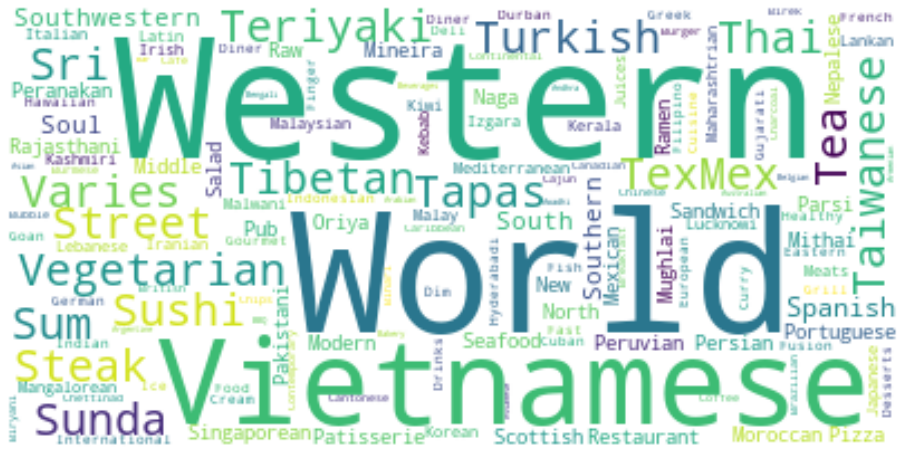

In [20]:

from wordcloud import WordCloud
from PIL import Image
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate_from_frequencies(a)

# Display the generated image:
# the matplotlib way:
plt.figure(figsize=(16, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## Pricing (Average cost for two)

### Data on the exchange rates of other countries against the dollar was taken on April 27, 2020, from the website https://www.x-rates.com/table/?from=USD&amount=1
- The average price for two people still uses the exchange rate of each country. In order to be more easily understood the entire price will be change into US Dollar (USD)
#### Before convert the price, fill NaN values of Average cost of two
##check 0 value in average cost two


In [21]:
averagecostzero=df[df['Average Cost for two'].isna()]
## we fill by average cost two based on their country
averagecostzero

Restaurant ID                 Restaurant Name  Country Code       City  \
84         17284105                   Cookie Shoppe           216     Albany   
85         17284302   El Vaquero Mexican Restaurant           216     Albany   
87         17284211  Pearly's Famous Country Cookng           216     Albany   
197        17330155                        Deorio's           216   Columbus   
235        17334679                          Azteca           216  Davenport   
271        17342548   Happy Joe's Pizza & Ice Cream           216    Dubuque   
328        17606621            HI Lite Bar & Lounge           216     Miller   
374        17582499                     Royal Hotel           216  Pocatello   
384        17582627                   Senor Iguanas           216  Pocatello   
634         3400073     The Latitude - Radisson Blu             1       Agra   
637         3400346                 Sheroes Hangout             1       Agra   
639         3400391                  Chapter 1 Cafe             1       Agra   
677        18317988                  The BrewMaster             1  Allahabad   
851        18279289            BMG - All Day Dining             1   Dehradun   
2364        2300497   Atmosphere Grill Cafe Sheesha             1     Kanpur   
2368       18312106                      UrbanCrave             1     Kanpur   
9242        3900245              Deena Chat Bhandar             1   Varanasi   
9254       18246202                 VNS Live Studio             1   Varanasi   

                                                Address  \
84                   115 N Jackson St, Albany, GA 31701   
85                     2700 Dawson Rd, Albany, GA 31707   
87                 814 N Slappey Blvd, Albany, GA 31701   
197           3201 Macon Rd Ste 167, Columbus, GA 31906   
235          4811 N Brady St Ste 3, Davenport, IA 52806   
271                   855 Century Dr, Dubuque, IA 52002   
328                109 N Broadway Ave, Miller, SD 57362   
374            11 E Main St, Lava Hot Springs, ID 83246   
384                  961 Hiline Rd, Pocatello, ID 83201   
634     Radisson Blu, Taj East Gate Road, Tajganj, Agra   
637   Opposite The Gateway Hotel, Fatehabad Road, Ta...   
639   1374 K/1375 K, 2nd floor, Dinesh Nagar, Fatehb...   
677        Near Vishal Megamart, Civil Lines, Allahabad   
851                140 A, Rajpur Road, Jakhan, Dehradun   
2364  8th Floor, J.S. Tower, 16/106 - Mall Road, Kan...   
2368  14/125, The Mall, Mall Road, Colonelganj, Para...   
9242    D-47/184, Luxa Road, Dashaswmedh Road, Varanasi   
9254  Hotel Varuna Ground Floor, 22 Gulab Bagh, Sigr...   

                   Locality             Locality Verbose   Longitude  \
84                   Albany               Albany, Albany  -84.154000   
85                   Albany               Albany, Albany  -84.219400   
87                   Albany               Albany, Albany  -84.175900   
197                Columbus           Columbus, Columbus  -84.942700   
235               Davenport         Davenport, Davenport  -90.568300   
271                 Dubuque             Dubuque, Dubuque  -90.726400   
328                  Miller               Miller, Miller  -98.989100   
374        Lava Hot Springs  Lava Hot Springs, Pocatello -112.012700   
384               Pocatello         Pocatello, Pocatello -112.443300   
634   Radisson Blu, Tajganj  Radisson Blu, Tajganj, Agra   78.057044   
637                 Tajganj                Tajganj, Agra   78.040165   
639                 Tajganj                Tajganj, Agra   78.032615   
677             Civil Lines       Civil Lines, Allahabad   81.832796   
851                  Jakhan             Jakhan, Dehradun   78.068890   
2364              Mall Road            Mall Road, Kanpur   80.354002   
2368                 Parade               Parade, Kanpur   80.342796   
9242       Dashaswmedh Road   Dashaswmedh Road, Varanasi   82.992199   
9254                  Sigra              Sigra, Varanasi   82.99169

In [22]:
def fillavgcost(x):
    # check if the value is nan 
    if pd.isnull(x['Average Cost for two']):
        # loop for each country that has nan value of average cost for two
        for item in averagecostzero['Country'].unique():
            if x['Country'] == item:
                # return mean based on country
                return df[df['Country']==item]['Average Cost for two'].mean()
    else:
        return x['Average Cost for two']
df['Average Cost for two']=df.apply(fillavgcost,axis=1)

In [23]:
dfcurrency=pd.read_excel('Data-Currency-by-27-April-2020.xlsx')
dfcurrency

Currency  Currency in USD($)
0          Argentine Peso           66.368724
1       Australian Dollar            1.546435
2          Bahraini Dinar            0.376000
3           Botswana Pula           12.235675
4          Brazilian Real            5.633967
5                  Pounds            0.804317
6         Bruneian Dollar            1.418007
7           Bulgarian Lev            1.802403
8         Canadian Dollar            1.406211
9            Chilean Peso          857.331844
10  Chinese Yuan Renminbi            7.082757
11         Colombian Peso         4042.078170
12          Croatian Kuna            6.958323
13           Czech Koruna           25.128855
14           Danish Krone            6.873444
15          Emirati Diram            3.672500
16                   Euro            0.921554
17       Hong Kong Dollar            7.749752
18       Hungarian Forint          326.422719
19        Icelandic Krona          146.338614
20          Indian Rupees           76.147568
21      Indonesian Rupiah        15420.183781
22           Iranian Rial        41955.639959
23         Israeli Shekel            3.507663
24           Japanese Yen          107.017895
25      Kazakhstani Tenge          431.216514
26          Kuwaiti Dinar            0.310472
27           Libyan Dinar            1.412518
28      Malaysian Ringgit            4.358168
29        Mauritian Rupee           40.026375
30           Mexican Peso           24.808922
31         Nepalese Rupee          122.407216
32     New Zealand Dollar            1.649473
33        Norwegian Krone           10.567119
34             Omani Rial            0.384500
35        Pakistani Rupee          160.694710
36        Philippine Peso           50.698302
37           Polish Zloty            4.172784
38            Qatari Rial            3.640000
39       Romanian New Leu            4.458932
40          Russian Ruble           74.346033
41    Saudi Arabian Riyal            3.750000
42       Singapore Dollar            1.418007
43                   Rand           18.807005
44       South Korean Won         1225.012787
45       Sri Lankan Rupee          192.586789
46          Swedish Krona           10.030264
47            Swiss Franc            0.974250
48      Taiwan New Dollar           30.040581
49              Thai Baht           32.456966
50     Trinidadian Dollar            6.750975
51           Turkish Lira            6.987788
52     Venezuelan Bolivar            9.987500

In [24]:
#because the writing of some currency with dollar is not specific (only dollars($))
#adjusting the name of the currency with the one in the exchange rate
def fillDollar(x):
    
    if x['Country'] =='New Zealand':
        return 'New Zealand Dollar($)'
    elif x['Country'] =='Australia':
        return 'Australian Dollar($)'
    elif x['Country'] =='Singapore':
        return 'Singapore Dollar($)'
    elif x['Country'] =='Canada':
        return 'Canadian Dollar($)'
    elif x['Country']=='Phillipines':
        return 'Philippine Peso(PHP)'
    else:
        return x['Currency']
df['Currency'] = df.apply(fillDollar,axis=1)

In [25]:
#Function for convert all price to US Dollar
def convertUSD(x):
    if x['Country']=='United States':
         return x['Average Cost for two']
    else:
         for item in dfcurrency['Currency'].values:
            if x['Currency'].split('(')[0]==item:
                return round(x['Average Cost for two']/dfcurrency[dfcurrency['Currency']==item]['Currency in USD($)'].values[0],2)
df['Average Cost for two']=df.apply(convertUSD,axis=1)

> Because all currencies are in USD, drop the origin currency and add '($USD)' in 'Average Cost for two' column 

In [26]:
df.drop('Currency',axis=1,inplace=False)
df.rename(columns={'Average Cost for two':'Average Cost for two ($USD)'},inplace=True)
df.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two ($USD)', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes', 'Country'],
      dtype='object')

## Statistic Test

**Hypothesis Testing** 
- If the amount of Cuisines variety would affect Aggregate rating

**H0**
- There are no significant difference between amount of Cuisines variety and Aggregate rating

**H1**
- There are significant difference between amount of Cuisines variety and Aggregate rating

In [27]:
df.dropna(axis=0,inplace=True)
df.reset_index(drop=True,inplace=True)

In [28]:
SumCuisine=[]
for i in range(len(df['Cuisines'])):
    SumCuisine.append(len(df['Cuisines'][i].split(',')))
df['Total Cuisines Variety']=SumCuisine
from scipy.stats import anderson

def try_normal(data):
    result = {'Anderson' : {i:j for i,j in zip(anderson(data)[2],anderson(data)[1])}}
    result['Anderson']['stat'] = anderson(data)[0]
    return result
try_normal(df['Total Cuisines Variety'])

{'Anderson': {15.0: 0.576,
  10.0: 0.656,
  5.0: 0.787,
  2.5: 0.918,
  1.0: 1.091,
  'stat': 369.63210205345695}}

> From anderson test, we conclude that data not normal dist.

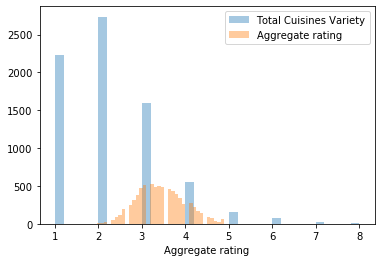

In [29]:
sns.distplot(df['Total Cuisines Variety'],label = 'Total Cuisines Variety', kde=False)
sns.distplot(df['Aggregate rating'],label = 'Aggregate rating', kde=False)
plt.legend()
plt.show()

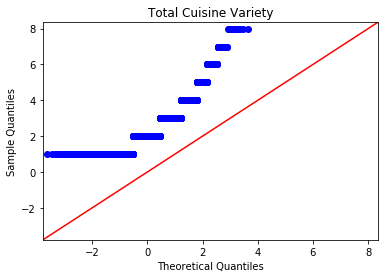

In [30]:
import statsmodels.api as sm 
import pylab
def create_qqplot(data,title):
    sm.qqplot(data, line='45')
    plt.title(title)
    pylab.show()
create_qqplot(df['Total Cuisines Variety'],'Total Cuisine Variety')

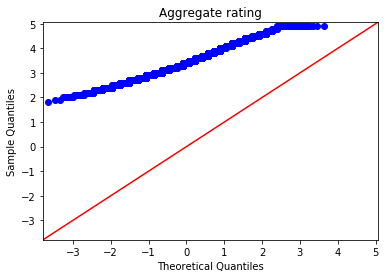

In [31]:
create_qqplot(df['Aggregate rating'],'Aggregate rating')

In [32]:
from pingouin import kruskal
kruskal(data=df, dv='Aggregate rating', between='Total Cuisines Variety')

Source  ddof1        H         p-unc
Kruskal  Total Cuisines Variety      7  160.002  3.204610e-31

In [33]:
from pingouin import pairwise_ttests
pairwise_ttests(data=df,dv='Aggregate rating',between='Total Cuisines Variety', parametric=False)

Contrast  A  B  Paired  Parametric      U-val       Tail  \
0   Total Cuisines Variety  3  1   False       False  1974904.0  two-sided   
1   Total Cuisines Variety  3  4   False       False   398042.0  two-sided   
2   Total Cuisines Variety  3  2   False       False  2437490.0  two-sided   
3   Total Cuisines Variety  3  5   False       False   111265.5  two-sided   
4   Total Cuisines Variety  3  6   False       False    38841.5  two-sided   
5   Total Cuisines Variety  3  7   False       False    17867.0  two-sided   
6   Total Cuisines Variety  3  8   False       False     8210.5  two-sided   
7   Total Cuisines Variety  1  4   False       False   489974.5  two-sided   
8   Total Cuisines Variety  1  2   False       False  3081694.5  two-sided   
9   Total Cuisines Variety  1  5   False       False   135756.5  two-sided   
10  Total Cuisines Variety  1  6   False       False    46333.5  two-sided   
11  Total Cuisines Variety  1  7   False       False    20807.0  two-sided   
12  Total Cuisines Variety  1  8   False       False     9267.0  two-sided   
13  Total Cuisines Variety  4  2   False       False   930420.0  two-sided   
14  Total Cuisines Variety  4  5   False       False    43724.5  two-sided   
15  Total Cuisines Variety  4  6   False       False    15408.5  two-sided   
16  Total Cuisines Variety  4  7   False       False     7256.5  two-sided   
17  Total Cuisines Variety  4  8   False       False     3399.0  two-sided   
18  Total Cuisines Variety  2  5   False       False   164444.0  two-sided   
19  Total Cuisines Variety  2  6   False       False    55785.0  two-sided   
20  Total Cuisines Variety  2  7   False       False    25476.5  two-sided   
21  Total Cuisines Variety  2  8   False       False    11379.0  two-sided   
22  Total Cuisines Variety  5  6   False       False     4441.5  two-sided   
23  Total Cuisines Variety  5  7   False       False     2153.0  two-sided   
24  Total Cuisines Variety  5  8   False       False     1006.5  two-sided   
25  Total Cuisines Variety  6  7   False       False     1223.5  two-sided   
26  Total Cuisines Variety  6  8   False       False      581.0  two-sided   
27  Total Cuisines Variety  7  8   False       False      188.0  two-sided   

           p-unc  hedges  
0   4.223477e-08   0.150  
1   1.326664e-04  -0.162  
2   8.895281e-10   0.180  
3   5.638250e-03  -0.192  
4   2.537009e-06  -0.499  
5   6.373506e-02  -0.319  
6   1.869272e-01  -0.341  
7   7.952740e-15  -0.324  
8   6.070530e-01   0.032  
9   3.610052e-07  -0.361  
10  8.373300e-10  -0.691  
11  2.281001e-03  -0.498  
12  2.414631e-02  -0.523  
13  1.852398e-16   0.352  
14  7.172161e-01  -0.031  
15  1.349030e-03  -0.344  
16  5.346538e-01  -0.161  
17  7.060898e-01  -0.184  
18  1.100613e-07  -0.386  
19  2.930976e-10  -0.711  
20  2.212578e-03  -0.521  
21  2.455744e-02  -0.546  
22  5.219419e-03  -0.332  
23  7.441312e-01  -0.142  
24  8.489740e-01  -0.168  
25  9.771305e-02   0.195  
26  1.678130e-01   0.169  
27  8.769944e-01  -0.029

## Country

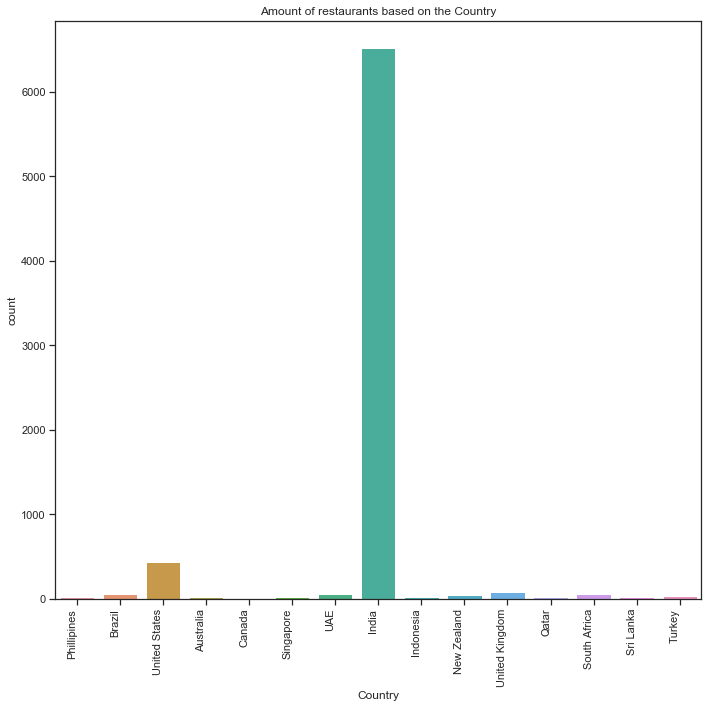

In [34]:
#Restaurant groupby country
plt.figure(figsize=(10,10))
ax = sns.countplot(x="Country", data=df)

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
ax.set_title('Amount of restaurants based on the Country')
plt.tight_layout()
plt.show()

In [35]:
#Percentage restaurant groupby country
df_counts=df.Country.value_counts()
x=df_counts.values
y=df_counts.keys()
fig = px.pie(df_counts, values=x, names=y, title='Percentage restaurant by Country')
fig.show()

> The graph shows the restaurants listed on Zoomato are mostly in India by percentage 90.6%

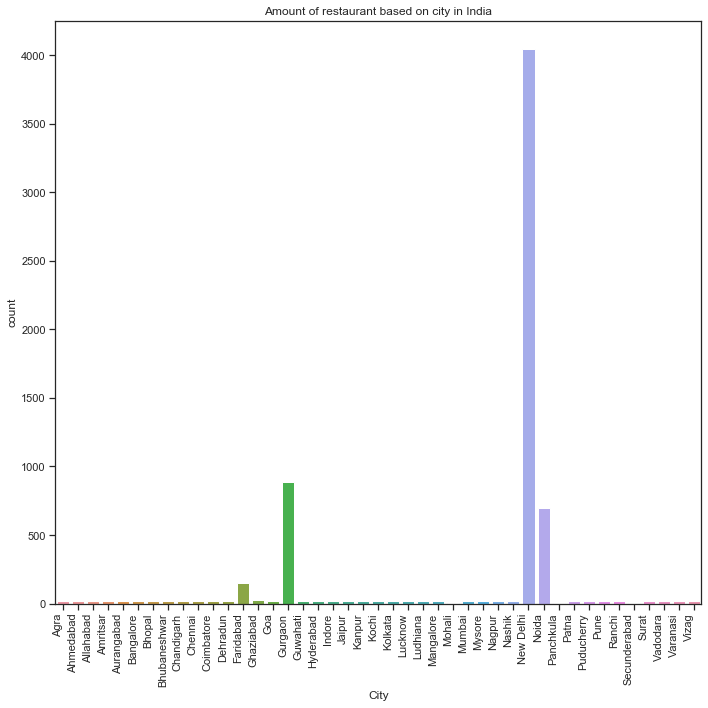

In [36]:
#Restaurant groupby city in India
plt.figure(figsize=(10,10))
ax = sns.countplot(x="City", data=df[df['Country']=='India'])

ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
ax.set_title('Amount of restaurant based on city in India')
plt.tight_layout()
plt.show()

> Most restaurant in India are located in New Delhi, Noida, Gurgaon and Faridabad

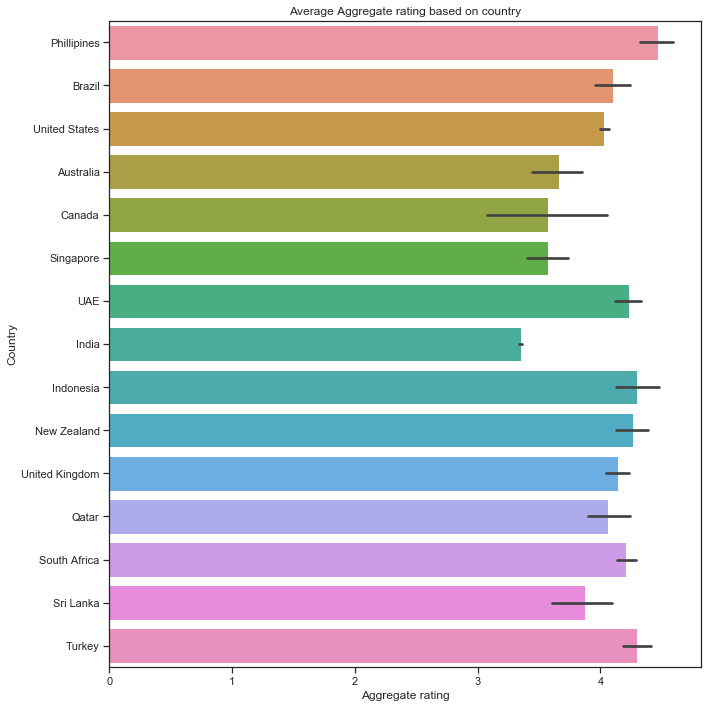

In [37]:
plt.figure(figsize=(10,10))
ax=sns.barplot(data=df,x='Aggregate rating',y='Country')
ax.set_title('Average Aggregate rating based on country')
plt.tight_layout()
plt.show()

## Average Cost for Two

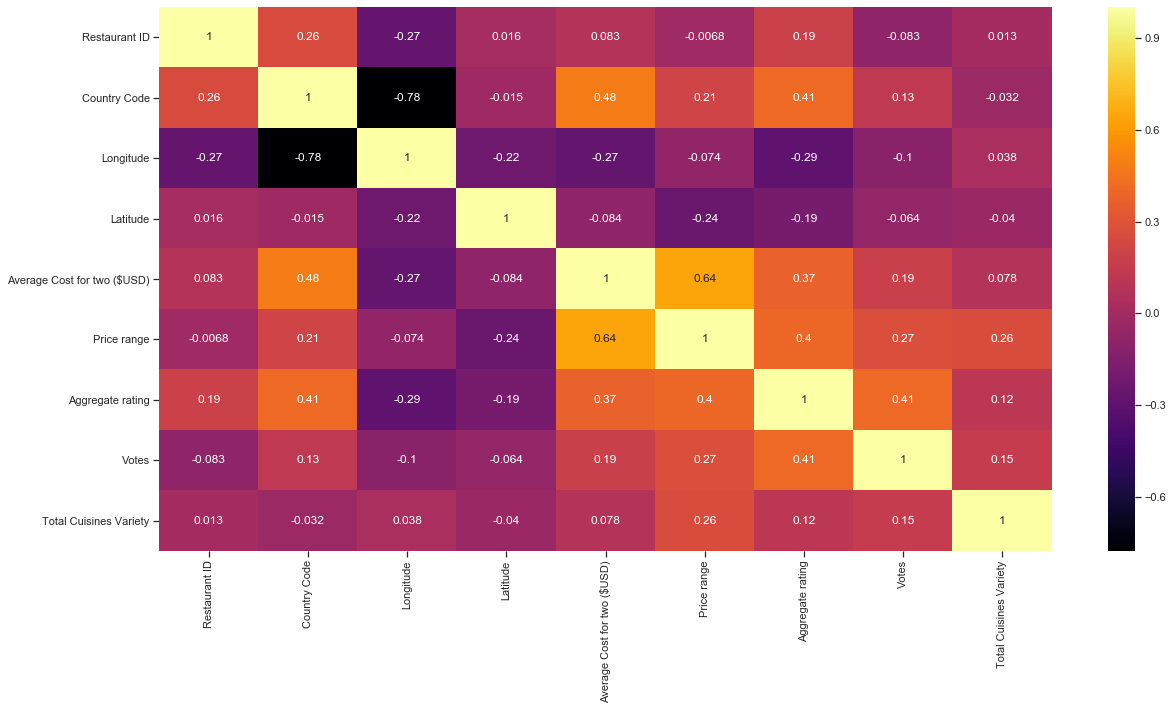

In [38]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(),annot=True,cmap='inferno')
plt.show()

In [39]:
import plotly.graph_objects as go
fig = go.Figure(go.Densitymapbox(lat=df.Latitude, lon=df.Longitude, z=df['Average Cost for two ($USD)'],radius=10))
fig.update_layout(mapbox_style="stamen-terrain", mapbox_center_lon=180)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

In [40]:
#Create data frame for average cost for two chart
dfCountryAvgCost=pd.DataFrame({'Country':df.groupby(['Country'])['Average Cost for two ($USD)'].mean().index,'Average Cost for two ($USD)':df.groupby(['Country'])['Average Cost for two ($USD)'].mean().values})
dfCountryAvgCost

Country  Average Cost for two ($USD)
0        Australia                    15.572500
1           Brazil                    25.202909
2           Canada                    25.780000
3            India                     9.413424
4        Indonesia                    18.236190
5      New Zealand                    42.286500
6      Phillipines                    31.694091
7            Qatar                    61.470000
8        Singapore                   109.837000
9     South Africa                    22.317333
10       Sri Lanka                    12.331000
11          Turkey                    12.143824
12             UAE                    45.314000
13  United Kingdom                    59.883165
14   United States                    26.717756

In [41]:
#Top 5 cheapest restaurant on Zomato
fig = px.bar(df.sort_values(by='Average Cost for two ($USD)',ascending=True).head(5), y='Average Cost for two ($USD)', x='Restaurant Name',hover_data=['Country','City'])
fig.update_layout(title="Top 5 cheapest restaurant on Zomato")
fig.show()

In [42]:
#Top 5 most expensive restaurant on Zomato
fig = px.bar(df.sort_values(by='Average Cost for two ($USD)',ascending=False).head(5), y='Average Cost for two ($USD)', x='Restaurant Name',hover_data=['Country','City'])
fig.update_layout(title="Top 5 most expensive restaurant on Zomato")
fig.show()

In [43]:
#Most Expensive and cheapest Average Cost for two ($USD)
fig = px.bar(dfCountryAvgCost.sort_values(by=['Average Cost for two ($USD)']), y='Average Cost for two ($USD)', x='Country')
fig.show()

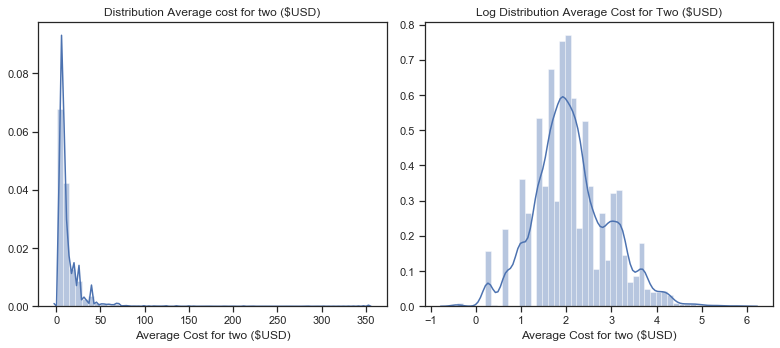

In [44]:
fig=plt.figure(figsize=(11,5))
ax = fig.add_subplot(1,2,1)
ax.set_title("Distribution Average cost for two ($USD)")
sns.distplot(df["Average Cost for two ($USD)"], color = "b")
ax = fig.add_subplot(1,2,2)
sns.distplot(np.log(df["Average Cost for two ($USD)"]),color="b")
ax.set_title('Log Distribution Average Cost for Two ($USD)')
fig.tight_layout()  
plt.show()

## Aggregate Rating

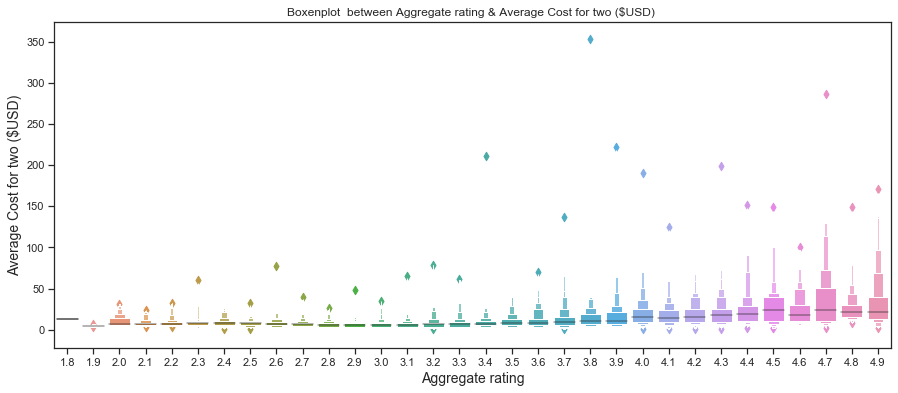

In [45]:
f, ax = plt.subplots(1, 1, figsize = (15, 6))
sns.boxenplot(x = "Aggregate rating", y = "Average Cost for two ($USD)", data = df, ax = ax)
ax.set_xlabel("Aggregate rating", fontsize = 14)
ax.set_ylabel("Average Cost for two ($USD)", fontsize = 14)
ax.set_title("Boxenplot  between Aggregate rating & Average Cost for two ($USD) ")
plt.show()

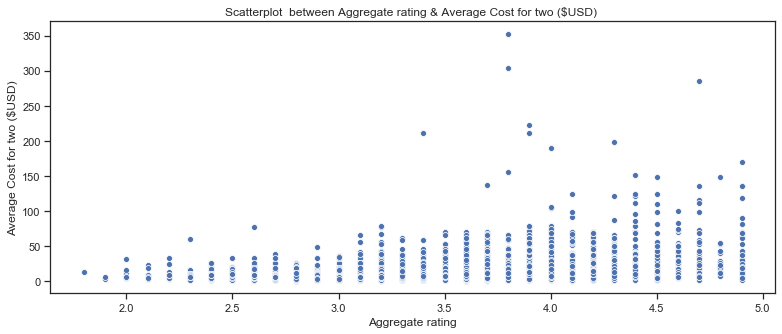

In [46]:
plt.figure(figsize=(13,5))
ax=sns.scatterplot(x = "Aggregate rating", y = "Average Cost for two ($USD)", data = df)
ax.set_title("Scatterplot  between Aggregate rating & Average Cost for two ($USD) ")
plt.show()

> The graph shows that the aggregate rating and average cost for two are not highly correlated even though prices seen above 50 $ did not touch the aggregate rating below 3

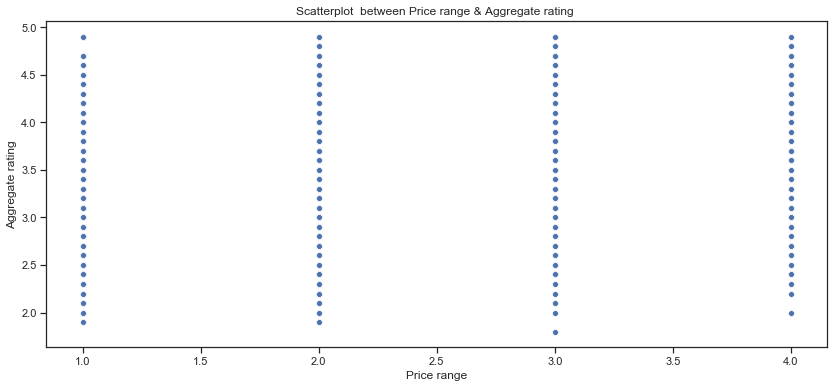

In [47]:
plt.figure(figsize=(14,6))
ax=sns.scatterplot(x = "Price range", y = "Aggregate rating", data = df)
ax.set_title("Scatterplot  between Price range & Aggregate rating ")
plt.show()

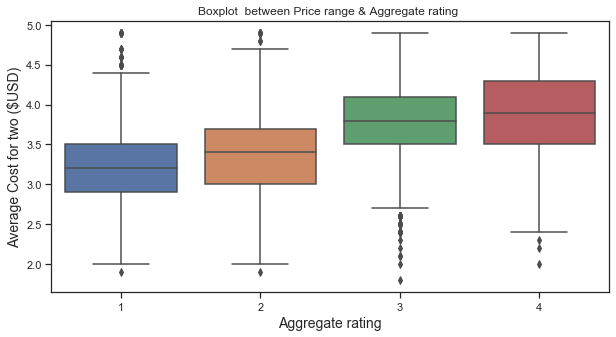

In [48]:
f, ax = plt.subplots(1, 1, figsize = (10, 5))
sns.boxplot(x = "Price range", y = "Aggregate rating", data = df, ax = ax)
ax.set_xlabel("Aggregate rating", fontsize = 14)
ax.set_ylabel("Average Cost for two ($USD)", fontsize = 14)
ax.set_title("Boxplot  between Price range & Aggregate rating ")
plt.show()

> 
The graph shows that Price Range does not correlate with Aggregate Rating

## Text Rating

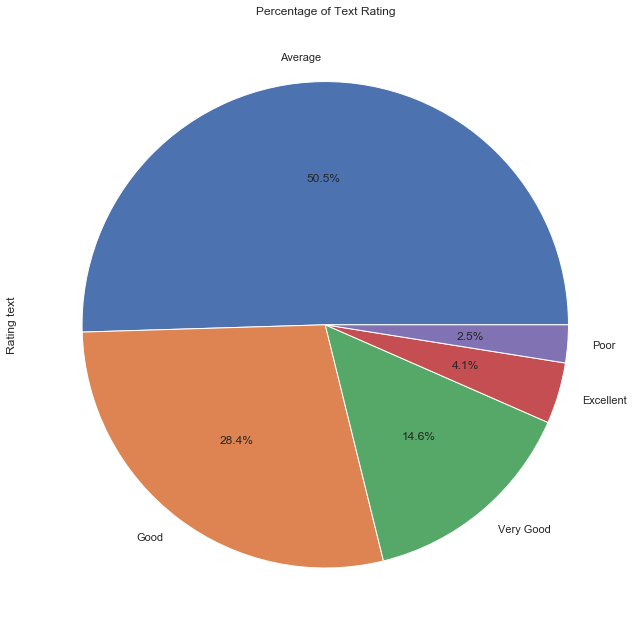

In [49]:
plt.figure(figsize=(10,9))
ax=df['Rating text'].value_counts().plot(kind='pie',autopct='%1.1f%%')
ax.set_title("Percentage of Text Rating")
plt.tight_layout()
plt.show()

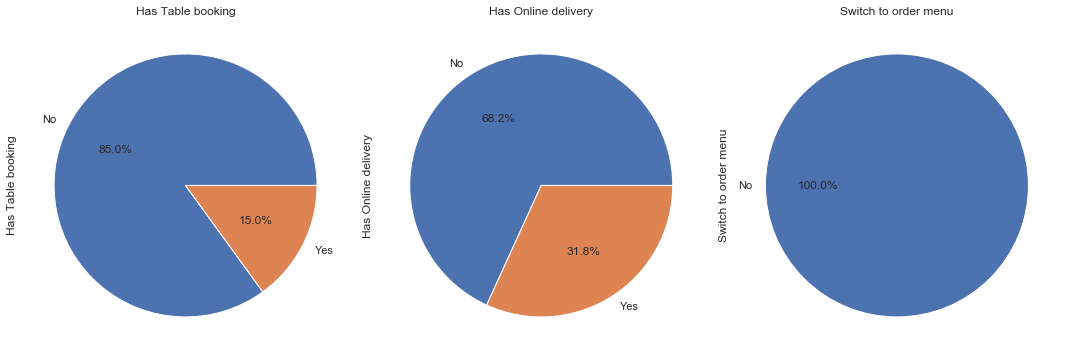

In [50]:
fig=plt.figure(figsize=(15,15))
ax = fig.add_subplot(1,3,1)
ax.set_title("Has Table booking")
df['Has Table booking'].value_counts().plot(kind='pie',autopct='%1.1f%%')
ax = fig.add_subplot(1,3,2)
df['Has Online delivery'].value_counts().plot(kind='pie',autopct='%1.1f%%')
ax.set_title('Has Online delivery')
ax = fig.add_subplot(1,3,3)
df['Switch to order menu'].value_counts().plot(kind='pie',autopct='%1.1f%%')
ax.set_title('Switch to order menu')
fig.tight_layout()  
plt.show()

# Votes

In [51]:
df

Restaurant ID           Restaurant Name  Country Code              City  \
0           6317637          Le Petit Souffle           162       Makati City   
1           6304287          Izakaya Kikufuji           162       Makati City   
2           6300002    Heat - Edsa Shangri-La           162  Mandaluyong City   
3           6318506                      Ooma           162  Mandaluyong City   
4           6314302               Sambo Kojin           162  Mandaluyong City   
...             ...                       ...           ...               ...   
7398        5915730              NamlÛ± Gurme           208         ÛÁstanbul   
7399        5908749             Ceviz AÛôacÛ±           208         ÛÁstanbul   
7400        5915807                     Huqqa           208         ÛÁstanbul   
7401        5916112              Aôôk Kahve           208         ÛÁstanbul   
7402        5927402  Walter's Coffee Roastery           208         ÛÁstanbul   

                                                Address  \
0     Third Floor, Century City Mall, Kalayaan Avenu...   
1     Little Tokyo, 2277 Chino Roces Avenue, Legaspi...   
2     Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...   
3     Third Floor, Mega Fashion Hall, SM Megamall, O...   
4     Third Floor, Mega Atrium, SM Megamall, Ortigas...   
...                                                 ...   
7398  Kemankeô Karamustafa Paôa Mahallesi, RÛ±htÛ±...   
7399  Koôuyolu Mahallesi, Muhittin íìstí_ndaÛô Cadd...   
7400  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
7401  Kuruí_eôme Mahallesi, Muallim Naci Caddesi, N...   
7402  CafeaÛôa Mahallesi, BademaltÛ± Sokak, No 21/B,...   

                                        Locality  \
0      Century City Mall, Poblacion, Makati City   
1     Little Tokyo, Legaspi Village, Makati City   
2     Edsa Shangri-La, Ortigas, Mandaluyong City   
3         SM Megamall, Ortigas, Mandaluyong City   
4         SM Megamall, Ortigas, Mandaluyong City   
...                                          ...   
7398                                    Karakí_y   
7399                                   Koôuyolu   
7400                                 Kuruí_eôme   
7401                                 Kuruí_eôme   
7402                                        Moda   

                                       Locality Verbose   Longitude  \
0     Century City Mall, Poblacion, Makati City, Mak...  121.027535   
1     Little Tokyo, Legaspi Village, Makati City, Ma...  121.014101   
2     Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...  121.056831   
3     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.056475   
4     SM Megamall, Ortigas, Mandaluyong City, Mandal...  121.057508   
...                                                 ...         ...   
7398                                Karakí_y, ÛÁstanbul   28.977392   
7399                               Koôuyolu, ÛÁstanbul   29.041297   
7400                             Kuruí_eôme, ÛÁstanbul   29.034640   
7401                             Kuruí_eôme, ÛÁstanbul   29.036019   
7402                                    Moda, ÛÁstanbul   29.026016   

       Latitude                          Cuisines  \
0     14.565443        French, Japanese, Desserts   
1     14.553708                          Japanese   
2     14.581404  Seafood, Asian, Filipino, Indian   
3     14.585318                   Japanese, Sushi   
4     14.584450                  Japanese, Korean   
...         ...                               ...   
7398  41.022793                           Turkish   
7399  41.009847   World Cuisine, Patisserie, Cafe   
7400  41.055817            Italian, World Cuisine   
7401  41.057979                   Restaurant Cafe   
7402  40.984776                              Cafe   

      Average Cost for two ($USD)              Currency Has Table booking  \
0                           21.70  Philippine Peso(PHP)               Yes   
1                           23.67  Philippine Peso(PHP)

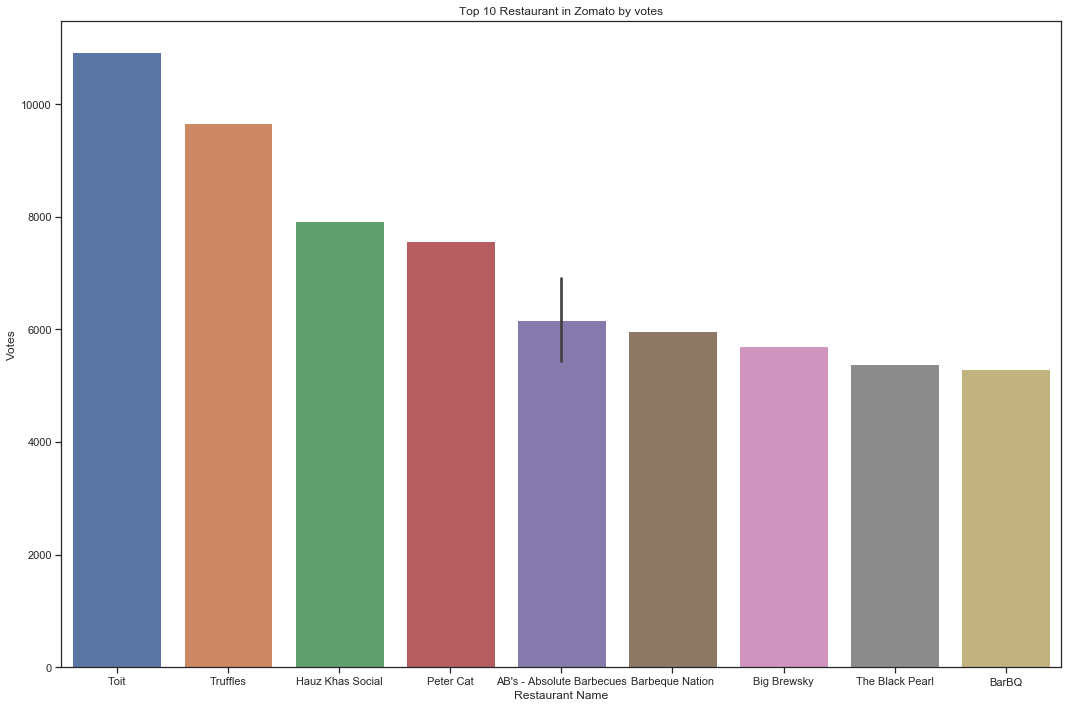

In [52]:
#Create dataframe to count votes
dfvote=df.sort_values(by='Votes',ascending=False)
dfvote.reset_index(drop=True,inplace=True)
#Take only top 10 data
dfvote=dfvote.head(10)
plt.figure(figsize=(15,10))
ax=sns.barplot(x="Restaurant Name", y="Votes", data=dfvote)
ax.set_title('Top 10 Restaurant in Zomato by votes')
plt.tight_layout()
plt.show()

In [53]:
df[df['Country']=='India']

Restaurant ID                        Restaurant Name  Country Code  \
616         3400025                             Jahanpanah             1   
617         3400341                    Rangrezz Restaurant             1   
618         3400005                Time2Eat - Mama Chicken             1   
619         3400021  Chokho Jeeman Marwari Jain Bhojanalya             1   
620         3400017                         Pinch Of Spice             1   
...             ...                                    ...           ...   
7124        2800100                               D Cabana             1   
7125        2800418                               Kaloreez             1   
7126        2800881                                Plot 17             1   
7127        2800042                       Vista - The Park             1   
7128        2800019               Flying Spaghetti Monster             1   

       City                                            Address  \
616    Agra  E 23, Shopping Arcade, Sadar Bazaar, Agra Cant...   
617    Agra  E-20, Shopping Arcade, Sadar Bazaar, Agra Cant...   
618    Agra        Main Market, Sadar Bazaar, Agra Cantt, Agra   
619    Agra  1/48, Delhi Gate, Station Road, Raja Mandi, Ci...   
620    Agra  23/453, Opposite Sanjay Cinema, Wazipura Road,...   
...     ...                                                ...   
7124  Vizag  Beach Road, Near Bus Stop, Sagar Nagar, Visakh...   
7125  Vizag  Plot 95, Opposite St. Lukes Nursing School, Da...   
7126  Vizag         Plot 17, Gangapur Layout, Siripuram, Vizag   
7127  Vizag  The Park, Beach Road, Pedda Waltair, Lawsons B...   
7128  Vizag  10-50-12/F2, Sai Dakshata Complex, Beside Leno...   

                   Locality              Locality Verbose  Longitude  \
616              Agra Cantt              Agra Cantt, Agra  78.011544   
617              Agra Cantt              Agra Cantt, Agra  78.032615   
618              Agra Cantt              Agra Cantt, Agra  78.011608   
619             Civil Lines             Civil Lines, Agra  77.998092   
620             Civil Lines             Civil Lines, Agra  78.007553   
...                     ...                           ...        ...   
7124            Sagar Nagar            Sagar Nagar, Vizag  83.361377   
7125              Siripuram              Siripuram, Vizag  83.323489   
7126              Siripuram              Siripuram, Vizag  83.315281   
7127  The Park, Lawsons Bay  The Park, Lawsons Bay, Vizag  83.336840   
7128        Waltair Uplands        Waltair Uplands, Vizag  83.314942   

       Latitude                                           Cuisines  \
616   27.161661                              North Indian, Mughlai   
617   27.166690                              North Indian, Mughlai   
618   27.160832                                       North Indian   
619   27.195928                                         Rajasthani   
620   27.201725                     North Indian, Chinese, Mughlai   
...         ...                                                ...   
7124  17.764287  Continental, Seafood, Chinese, North Indian, B...   
7125  17.729957                        Cafe, North Indian, Chinese   
7126  17.719539                             Burger, Pizza, Biryani   
7127  17.721182          American, North Indian, Thai, Continental   
7128  17.721119                                            Italian   

      Average Cost for two ($USD)            Currency Has Table booking  \
616                         11.16  Indian Rupees(Rs.)                No   
617                          9.19  Indian Rupees(Rs.)                No   
618                          6.57  Indian Rupees(Rs.)                No   
619                          5.25  Indian Rupees(Rs.)                No   
620                         13.13  Indian Rupees(Rs.)                No   
...                           ...                 ...               ...   
7124                         7.88  Indian Rupees(Rs.)                

### Import for modelling

In [54]:
df.isna().sum()#Final check for cleaned data frame

Restaurant ID                  0
Restaurant Name                0
Country Code                   0
City                           0
Address                        0
Locality                       0
Locality Verbose               0
Longitude                      0
Latitude                       0
Cuisines                       0
Average Cost for two ($USD)    0
Currency                       0
Has Table booking              0
Has Online delivery            0
Is delivering now              0
Switch to order menu           0
Price range                    0
Aggregate rating               0
Rating color                   0
Rating text                    0
Votes                          0
Country                        0
Total Cuisines Variety         0
dtype: int64

In [55]:
df.to_csv('ZomatoCleanedData.csv')